<a href="https://colab.research.google.com/github/AndriiKulakovskyi/image_processing/blob/main/ai_isp_filters/denoising/noise2noise/n2n_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision

In [4]:
import os, imageio, numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [6]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [7]:
# Path to BSDS500 image dataset
root_train = '/content/drive/My Drive/Colab Notebooks/Data/BSDS500/train/'
root_valid = '/content/drive/My Drive/Colab Notebooks/Data/BSDS500/val/'

In [9]:
print('Train images: ', len(os.listdir(root_train)))
print('Valid images: ', len(os.listdir(root_valid)))

Train images:  400
Valid images:  100


In [ ]:
class NoisyDataset(Dataset):
    
    def __init__(self,
                 root_dir,
                 crop_size=128,
                 train_noise_model=('gaussian', 50),
                 clean_targ=False,
                 img_bitdepth=8):
        """
        root_dir: Path of image directory
        crop_size: Crop image to given size
        clean_targ: Use clean targets for training
        """
        self.root_dir = root_dir
        self.crop_size = crop_size
        self.clean_targ = clean_targ
        self.img_bitdepth = img_bitdepth
        self.noise = train_noise_model[0]
        self.noise_param = train_noise_model[1]
        self.imgs = os.listdir(root_dir)
      
    def __len__(self):
        return len(self.imgs)

    
    def _random_crop_to_size(self, imgs):
        
        w, h = imgs[0].size
        assert w >= self.crop_size and h >= self.crop_size, 'Cannot be croppped. Invalid size'
        

        cropped_imgs = []
        i = np.random.randint(0, h - self.crop_size + 2)
        j = np.random.randint(0, w - self.crop_size + 2)

        for img in imgs:
            if min(w, h) < self.crop_size:
                img = tvF.resize(img, (self.crop_size, self.crop_size))
            cropped_imgs.append(tvF.crop(img, i, j, self.crop_size, self.crop_size))
        
        #cropped_imgs = cv2.resize(np.array(imgs[0]), (self.crop_size, self.crop_size))
        return cropped_imgs
    
    def _add_gaussian_noise(self, image):
        """
        Added only gaussian noise
        """
        w, h = image.size
        c = len(image.getbands())
        
        std = np.random.uniform(0, self.noise_param)
        _n = np.random.normal(0, std, (h, w, c))
        noisy_image = np.array(image) + _n
        
        noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
        return {'image':Image.fromarray(noisy_image), 'mask': None, 'use_mask': False}

    def corrupt_image(self, image):
        if self.noise == 'gaussian':
            return self._add_gaussian_noise(image)
        else:
            raise ValueError('No such image corruption supported')

    def __getitem__(self, index):
        """
        Read a image, corrupt it and return it
        """
        img_path = os.path.join(self.root_dir, self.imgs[index])
        image = imageio.imread(img_path) / self.img_bitdepth

        if self.crop_size > 0:
            image_clean = self._random_crop_to_size([image])[0]

        image_noisy = self.corrupt_image(image_clean)
        
        # Conver to tensor
        image_clean = torch.from_numpy(image_clean)
        image_noisy = torch.from_numpy(image_noisy)

        return image_noisy, image_clean

In [55]:
path = os.path.join(root_folder, image_names[0])
with rawpy.imread(path) as raw:
    rgb = raw.postprocess()

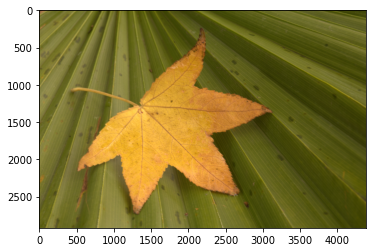

In [56]:
plt.figure()
plt.imshow(rgb)

In [33]:
def load_dng(path):
  rawpy.

['a0118-20051223_103622__MG_0617.dng',
 'a0122-NKIM_MG_8181.dng',
 'a0121-jmac_MG_7813.dng',
 'a0120-_MG_0300.dng',
 'a0119-kme_120.dng',
 'a0126-DSC_0025.dng',
 'a0125-kme_314.dng',
 'a0124-jmac_DSC3133.dng',
 'a0123-JI2E4140.dng',
 'a0130-kme_494.dng',
 'a0129-kme_532.dng',
 'a0128-IMG_0793.dng',
 'a0127-kme_578.dng',
 'a0134-LS051025_day_2_LL003.dng',
 'a0133-050724_185320__I2E5160.dng',
 'a0132-tc_DSC2376.dng',
 'a0131-050801_142414__I2E5524.dng',
 'a0139-060526_142248__MG_8130.dng',
 'a0138-_DSC2986.dng',
 'a0137-IMG_4565.dng',
 'a0136-CRW_0157.dng',
 'a0135-IMG_2595.dng',
 'a0143-kme_060.dng',
 'a0142-IMG_2048.dng',
 'a0141-IMG_3342.dng',
 'a0140-jmac_DSC3242.dng',
 'a0148-07-07-16-at-23h50m49s-_MG_2214.dng',
 'a0147-kme_333.dng',
 'a0146-07-11-23-at-10h54m29s-_MG_6544.dng',
 'a0145-DSC_0009-1.dng',
 'a0144-07-11-20-at-16h38m08s-_MG_5725.dng',
 'a0153-kme_560.dng',
 'a0152-IMG_2713.dng',
 'a0151-JI2E3955.dng',
 'a0150-_DSC0064.dng',
 'a0149-tc_DSC3938.dng',
 'a0158-051124_163114_